In [1]:
from tensorflow.keras import models, layers
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
import warnings
warnings.filterwarnings("ignore")

In [2]:
BATCH_SIZE = 64
IMAGE_SIZE = 256
EPOCHS=10
CHANNELS=3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"C:\\Users\\mylav\\Downloads\\Oral Cancer",
seed=123,
shuffle=True,
image_size=(IMAGE_SIZE, IMAGE_SIZE),
batch_size=BATCH_SIZE
)

Found 10002 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names
class_names

['oral_normal', 'oral_scc']

In [5]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(image_batch[1])
    print(label_batch.numpy())

(64, 256, 256, 3)
tf.Tensor(
[[[ 87.5   74.5  143.5 ]
  [ 67.5   57.   121.5 ]
  [ 82.5   72.5  134.5 ]
  ...
  [183.5  180.5  207.5 ]
  [183.   180.   207.  ]
  [182.25 179.25 206.25]]

 [[ 91.25  78.25 147.25]
  [ 70.5   60.   124.5 ]
  [ 82.25  72.25 134.25]
  ...
  [187.75 182.75 213.75]
  [189.   184.   215.  ]
  [188.75 183.75 214.75]]

 [[ 95.25  82.25 151.25]
  [ 74.    63.25 128.5 ]
  [ 81.25  71.25 133.25]
  ...
  [186.   178.5  215.  ]
  [185.   177.5  214.  ]
  [184.5  176.25 213.  ]]

 ...

 [[222.   227.   221.  ]
  [222.   227.   221.  ]
  [222.   227.   221.  ]
  ...
  [191.   203.   203.  ]
  [198.   208.   209.  ]
  [202.75 212.75 214.75]]

 [[222.   227.   223.  ]
  [222.   227.   223.  ]
  [222.   227.   223.  ]
  ...
  [190.25 202.25 202.25]
  [203.5  213.5  215.5 ]
  [210.5  220.5  222.5 ]]

 [[224.   226.   223.  ]
  [224.   226.   223.  ]
  [224.   226.   223.  ]
  ...
  [190.25 202.25 202.25]
  [208.   218.   220.  ]
  [215.5  225.5  227.5 ]]], shape=(256, 256,

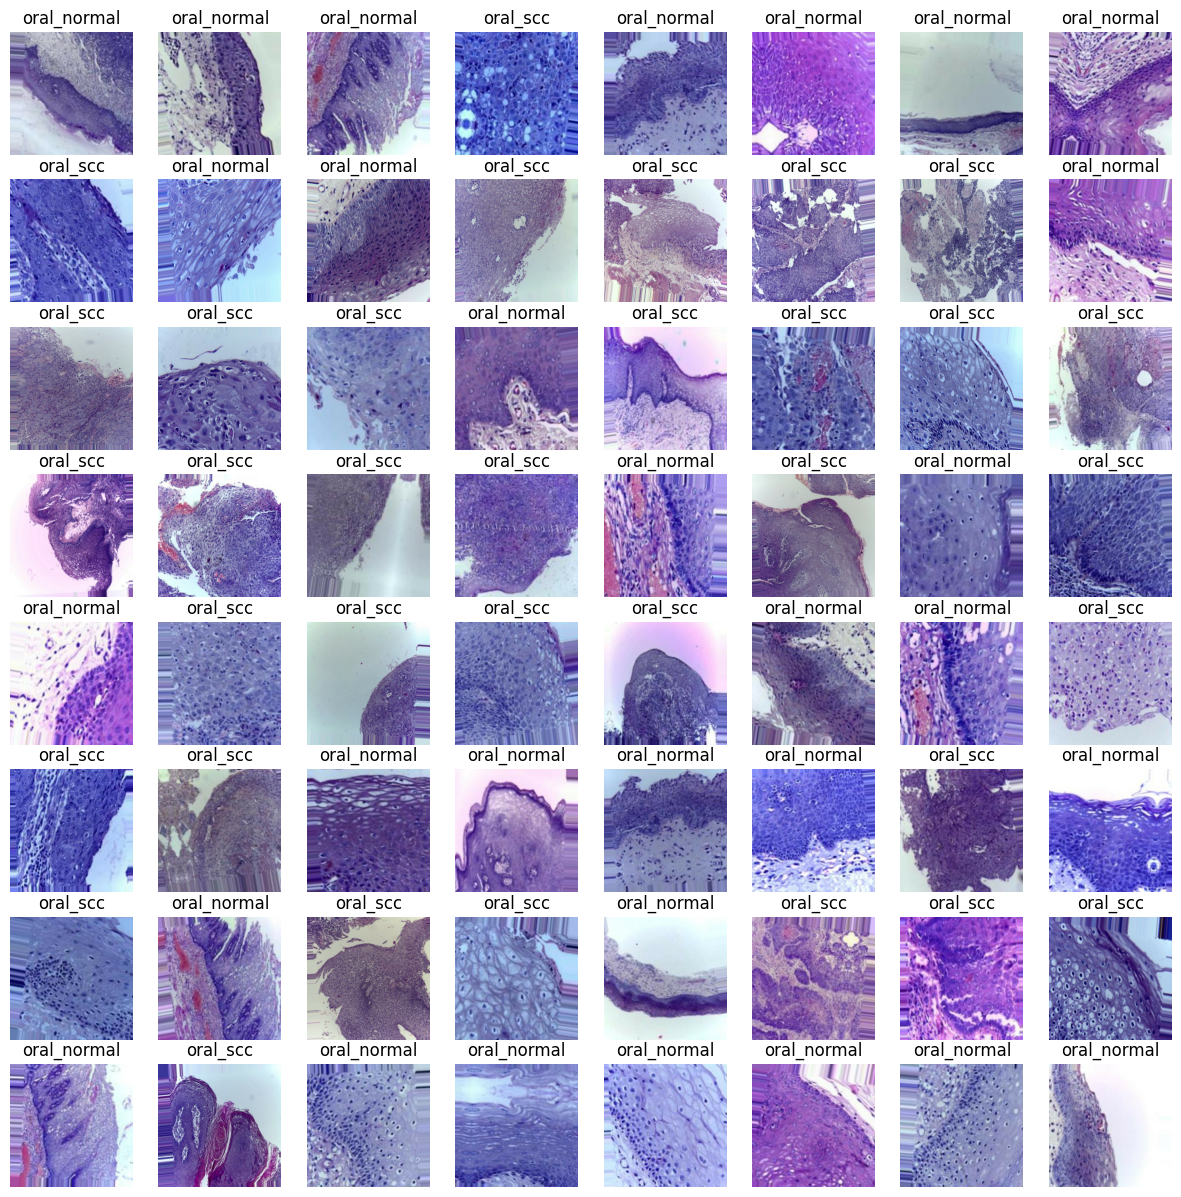

In [6]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE): 
        ax= plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [8]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [9]:
resize_and_rescale = tf.keras.Sequential([ layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE), 
                                          layers.experimental.preprocessing. Rescaling(1./255),
                                         ])

In [10]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9
model=models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    ])
model.build(input_shape=input_shape)

In [11]:
model.compile(
optimizer='adam',
loss=tf.keras.losses. SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (64, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (64, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (64, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (64, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (64, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (64, 60, 60, 64)         

In [13]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)    

In [14]:
history = model.fit_generator(
    train_ds,
    validation_data=val_ds,
    verbose=1,
    callbacks = [early],
    epochs=EPOCHS,
)

Epoch 1/10




125/125 [==============================] - 317s 2s/step - loss: 0.7599 - accuracy: 0.5128 - val_loss: 0.7071 - val_accuracy: 0.5073
Epoch 2/10
125/125 [==============================] - 341s 2s/step - loss: 0.6888 - accuracy: 0.5400 - val_loss: 0.6741 - val_accuracy: 0.5823
Epoch 3/10
125/125 [==============================] - 365s 2s/step - loss: 0.6816 - accuracy: 0.5675 - val_loss: 0.6664 - val_accuracy: 0.5938
Epoch 4/10
125/125 [==============================] - 305s 2s/step - loss: 0.6653 - accuracy: 0.5967 - val_loss: 0.7154 - val_accuracy: 0.4948
Epoch 5/10
125/125 [==============================] - 304s 2s/step - loss: 0.6525 - accuracy: 0.6130 - val_loss: 0.6484 - val_accuracy: 0.5958
Epoch 6/10
125/125 [==============================] - 345s 2s/step - loss: 0.6400 - accuracy: 0.6216 - val_loss: 0.6585 - val_accuracy: 0.6302
Epoch 7/10
125/125 [==============================] - 344s 2s/step - loss: 0.6128 - accuracy: 0.6625 - val_loss: 0.5951 - val_accuracy: 0.6625
Epoch 8/

In [15]:
model.evaluate(test_ds)

17/17 [==============================] - 64s 1s/step - loss: 0.5569 - accuracy: 0.7123


[0.5569033622741699, 0.7123161554336548]

In [16]:
import PIL
from PIL import Image
image_path = "C://Users//mylav//Downloads//Oral Cancer//oral_scc//oral_scc_0028.jpg"

image=preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image
pred=model.predict(scaled_img)

1/1 [==============================] - 1s 1s/step


In [17]:
class_labels = ["Normal","OSCC"]
output=class_labels[np.argmax(pred)]
output



'OSCC'

In [18]:
from keras.models import load_model
model.save("network.h5")
loaded_model=load_model("network.h5")
loss,accuracy=loaded_model.evaluate(test_ds)

17/17 [==============================] - 67s 952ms/step - loss: 0.5402 - accuracy: 0.7325
